In [35]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import random
%matplotlib inline

In [36]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
print("the shape of x_train is: {} and y_train is:{}".format(x_train.shape,y_train.shape))
print("the shape of x_test is: {} and y_test is:{}".format(x_test.shape,y_test.shape))

the shape of x_train is: (60000, 28, 28) and y_train is:(60000,)
the shape of x_test is: (10000, 28, 28) and y_test is:(10000,)


In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [44]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


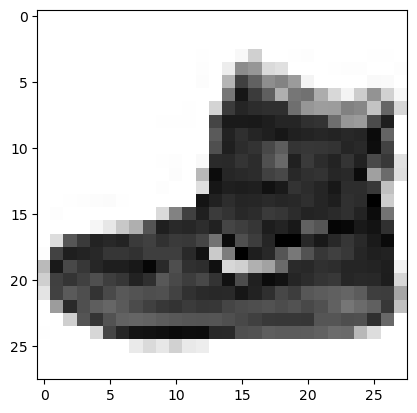

In [46]:
plt.imshow(x_train[0], cmap="Greys")

In [48]:
x_train.shape

(60000, 28, 28)

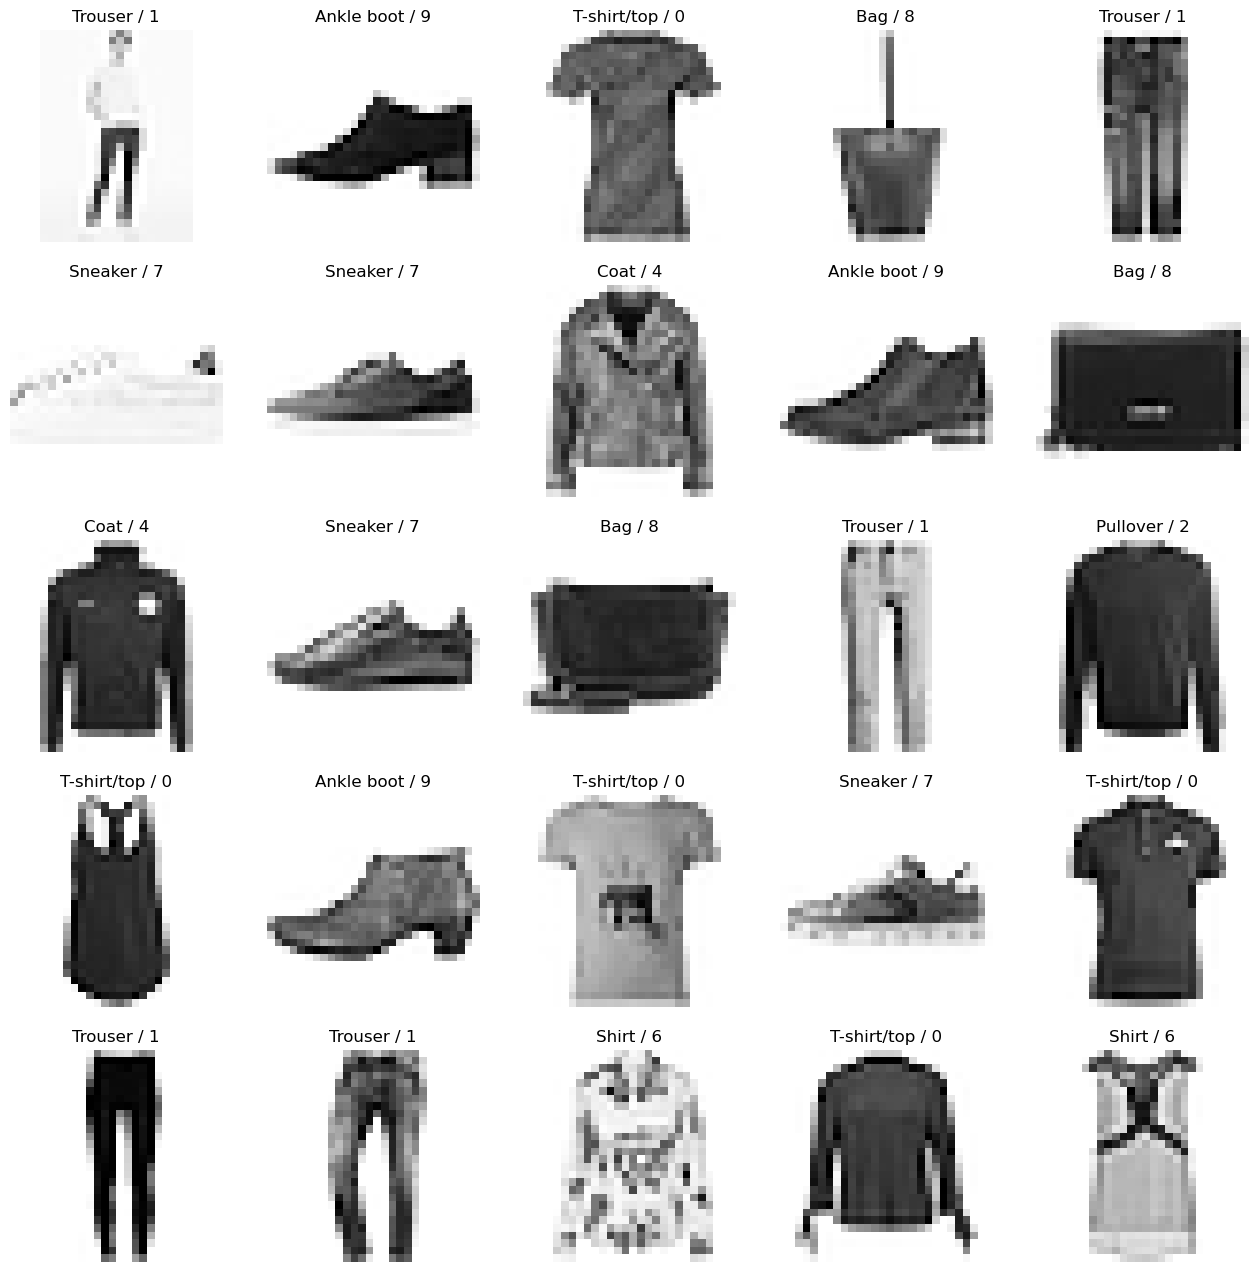

In [50]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j)
    plt.imshow(x_train[i], cmap = "Greys")
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
    j += 1
plt.show()

In [52]:
x_train.ndim

3

In [54]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [56]:
x_train = x_train/255.0
x_test = x_test/255.0

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train,test_size=0.2)

In [60]:
print(x_train.shape, y_train.shape, x_validation.shape, y_validation.shape)

(48000, 28, 28, 1) (48000,) (12000, 28, 28, 1) (12000,)


In [62]:
cnn = keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid',activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [64]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [66]:
cnn.fit(x_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.7073 - loss: 0.7778 - val_accuracy: 0.8447 - val_loss: 0.4212
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8595 - loss: 0.3798 - val_accuracy: 0.8703 - val_loss: 0.3496
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8803 - loss: 0.3277 - val_accuracy: 0.8929 - val_loss: 0.2898
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8940 - loss: 0.2869 - val_accuracy: 0.8935 - val_loss: 0.2947
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8990 - loss: 0.2743 - val_accuracy: 0.9003 - val_loss: 0.2797
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9076 - loss: 0.2504 - val_accuracy: 0.9063 - val_loss: 0.2658
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9096 - loss: 0.2394 - val_accuracy: 0.9034 - val_loss: 0.2738
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9130 - loss: 

In [70]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [68]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9028 - loss: 0.3467


[0.33801865577697754, 0.9036999940872192]

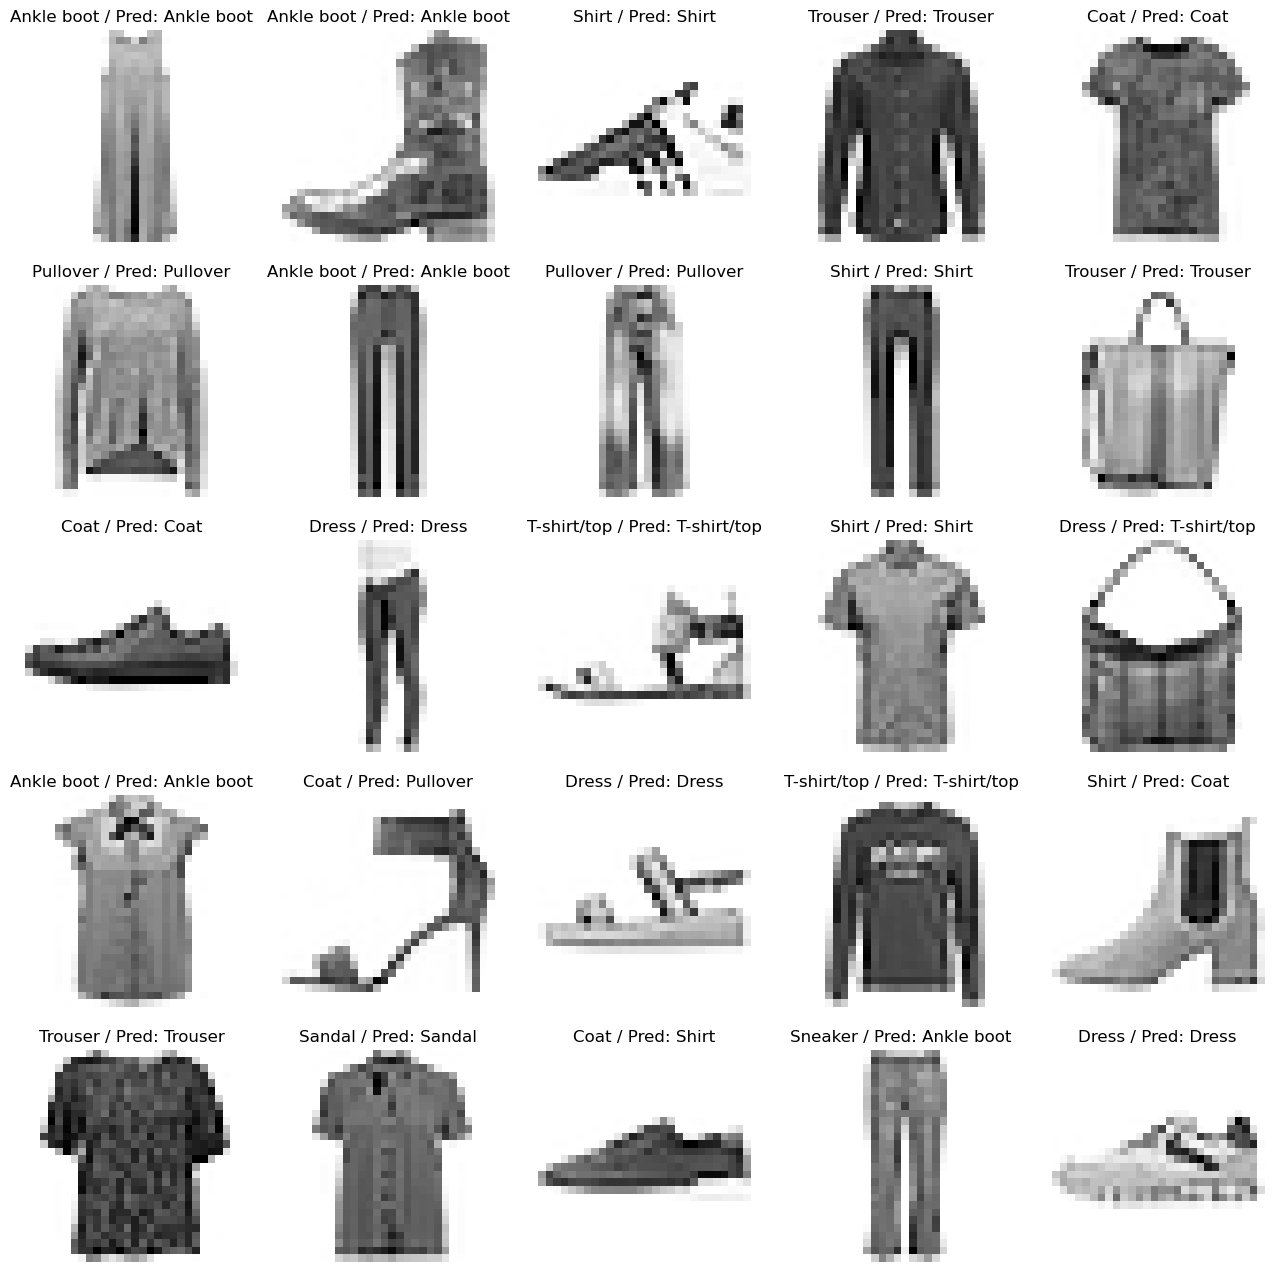

In [72]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,len(x_test),25):
    plt.subplot(5,5,j)
    plt.imshow(x_train[i].reshape(28,28), cmap="Greys")
    plt.axis('off')
    plt.title('{} / Pred: {}'.format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))
    j += 1
plt.show()